In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Electric Field from Spherical Shell

Consider a unit spherical shell in $\mathbb{R}^3$ centered at the origin with constant surface charge density $\sigma$.
Find the electric field vector at point $(x, y, z)$ produced by the charged surface.

$$
\begin{align*}
0 \le \theta \le 2 \pi \\
0 \le \phi \le \pi \\
\mathbf{r} = \langle \cos \theta \sin \phi, \sin \theta \sin \phi, \cos \phi \rangle \\
\hat{\mathbf{r}} = \frac{\mathbf{p} - \mathbf{r}}{|\mathbf{p} - \mathbf{r}|} \\
dA = \sin \phi \, d\phi \, d\theta \\
\mathbf{p} = \langle x, y, z \rangle
\end{align*}
$$

$$
\begin{align*}
\mathbf{E}
    &= \int_0^{2\pi} \int_0^\pi \frac{k \sigma}{ |\mathbf{p} - \mathbf{r}|^2 } \hat{\mathbf{r}} \, dA \\
    &= \int_0^{2\pi} \int_0^\pi \frac{k \sigma}{ |\mathbf{p} - \mathbf{r}|^3 } (\mathbf{p} - \mathbf{r}) \, dA
\end{align*}
$$

inside (0.02248518437962211, -0.00014823917916770076, 7.657748787924957e-05)
inside (0.03172487134797582, -0.0002991858408230407, 6.992098805589817e-05)
inside (0.015981565259045434, -0.01029962498530145, 5.4794300522991845e-05)
inside (0.030156806805937464, -0.00019881626104360745, 0.0009465974312065408)
inside (0.5371193217750108, -0.07628584511911757, 2.9181876514044374e-05)
outside (50.63925933871248, -0.07254271677261508, 2.5118644906559334e-05)
outside (25.052159762083015, -0.0005149900785176276, 1.3069991868799055e-05)
outside (14.100835651056132, -9.275012827334726e-05, 6.849290114502017e-06)


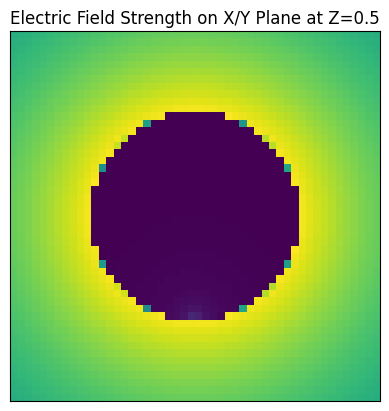

In [2]:
def sample():
    k = 8.988
    sigma = 1
    
    def electric_field(x, y, z):
        dtheta = dphi = 0.005

        def dA(phi):
            return np.sin(phi) * dphi * dtheta

        thetas = np.arange(0, 2 * np.pi - dtheta, dtheta * 2)
        phis = np.arange(0, np.pi, dphi)

        theta, phi = np.meshgrid(thetas, phis)

        rx = np.cos(theta) * np.sin(phi)
        ry = np.sin(theta) * np.sin(phi)
        rz = np.cos(phi)

        dx = x - rx
        dy = y - ry
        dz = z - rz
        d2 = dx**2.0 + dy**2.0 + dz**2.0
        
        coefs = k * sigma / d2**(3/2) * dA(phi)

        return (coefs * dx).sum(), (coefs * dy).sum(), (coefs * dz).sum()

    def plot_electric_field_strength_on_z(z):
        N = 50
        result = np.zeros((N, N))
        for i, x in enumerate(np.linspace(-1.5, 1.5, N)):
            for j, y in enumerate(np.linspace(-1.5, 1.5, N)):
                mx, my, mz = electric_field(x, y, z)
                result[i:i+1,j:j+1] = np.log(np.sqrt(mx**2.0 + my**2.0 + mz**2.0) + 1)
    
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.set_title('Electric Field Strength on X/Y Plane at Z={:.1f}'.format(z))
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow(result)
        plt.show()

    # Show the electric field at some key points.
    # These should be close to 0.
    print('inside', electric_field(0.0,  0.0,  0.0))
    print('inside', electric_field(0.25, 0.0,  0.0))
    print('inside', electric_field(0.0,  0.50, 0.0))
    print('inside', electric_field(0.0,  0.0,  0.75))
    print('inside', electric_field(0.95, 0.0,  0.0))

    # Show the electric field at some key points.
    # These should point away from the sphere and have an appreciable field.
    print('outside', electric_field(1.05, 0.0, 0.0))
    print('outside', electric_field(1.50, 0.0, 0.0))
    print('outside', electric_field(2.00, 0.0, 0.0))

    # Show the electric field strength.
    plot_electric_field_strength_on_z(0.5)

sample()

In [3]:
def sample():
    def sphere_area():
        dtheta = dphi = 0.001

        def dA(phi):
            return np.sin(phi) * dphi * dtheta

        thetas = np.arange(0, 2 * np.pi, dtheta)
        phis = np.arange(0, np.pi, dphi)

        theta, phi = np.meshgrid(thetas, phis)

        return dA(phi).sum()

    print(sphere_area())

sample()

12.567999711193576
